In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
def load_from_txt(filepath):
    """ Load data txt file from filepath name 
    
    :param filepath: filepath name
    """
    data = ""
    with open(filepath, encoding='cp1252') as f:
        data = f.read()
    return data

In [3]:
path = "../data/archive/bbc"

In [4]:
# read data from files into each category
os.listdir(path)

['entertainment', 'business', 'sport', 'politics', 'README.TXT', 'tech']

In [5]:
# read data from bbc directory in pandas DataFrame
frames = []
for dirname in os.listdir(path):
    
    if dirname in ['entertainment', 'business', 'sport', 'politics', 'tech']:
        # get all txt files in a list
        txtfiles = [file for file in glob.glob(path + "/" + dirname + "/*.txt")]
        
        labels = []
        texts = []
        for file in txtfiles:
            text = str(load_from_txt(file))
            labels.append(dirname)
            texts.append(text)
            
        df = pd.DataFrame()
        df['text'] = texts
        df['label'] = labels
        frames.append(df)
         

In [6]:
df = pd.concat(frames)

In [7]:
df.head()

,text,label
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment
1,"U2's desire to be number one\n\nU2, who have w...",entertainment
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment
3,Snicket tops US box office chart\n\nThe film a...,entertainment
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment


In [8]:
df.label.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: label, dtype: int64

In [9]:
df.label.value_counts().describe()

count      5.000000
mean     445.000000
std       60.790624
min      386.000000
25%      401.000000
50%      417.000000
75%      510.000000
max      511.000000
Name: label, dtype: float64

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'label')

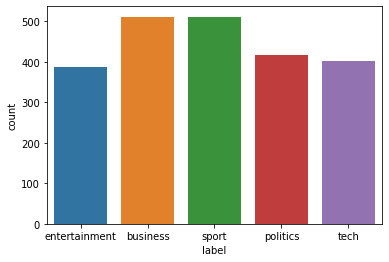

In [10]:
# check data distribution
ax = sns.countplot(df['label'])
plt.xlabel('label')

In [11]:
# save dataframe to csv
df.to_csv('../data/dataset.csv', sep='\t', index=False)